In [2]:
import pandas as pd

# Load your data
df = pd.read_csv(r'D:\VJTI\TY\sem 6\ds lab\ds_project\EV_Charging_Station_Optimization\data\raw\final_dataset_with_features.csv')

# Check the first few rows
print(df.head())

# Check column names
print(df.columns)


  ward_name  population_density  income_level  vehicle_density  \
0    Ward_1             35795.0        129929              990   
1    Ward_2             20860.0        138618              956   
2    Ward_3             96820.0        103509              127   
3    Ward_4             74886.0         38577              165   
4    Ward_5             26265.0         38070              262   

   existing_ev_stations  major_roads  commercial_areas  power_substations  \
0                  12.0           13                26                  5   
1                   0.0            7                10                  2   
2                   0.0           18                25                  6   
3                   5.0           17                36                  6   
4                   3.0           13                39                  5   

   traffic_congestion_score  parking_spots  ...  ev_station_density  \
0                  0.709160            154  ...           12.121212  

In [3]:
# 1. Import pandas
import pandas as pd

# 2. Load dataset
df = pd.read_csv(r'D:\VJTI\TY\sem 6\ds lab\ds_project\EV_Charging_Station_Optimization\data\raw\final_dataset_with_features.csv')

# 3. Print first 5 rows
print(df.head())

# 4. List all column names
print("\nColumns in the dataset:")
print(df.columns.tolist())


  ward_name  population_density  income_level  vehicle_density  \
0    Ward_1             35795.0        129929              990   
1    Ward_2             20860.0        138618              956   
2    Ward_3             96820.0        103509              127   
3    Ward_4             74886.0         38577              165   
4    Ward_5             26265.0         38070              262   

   existing_ev_stations  major_roads  commercial_areas  power_substations  \
0                  12.0           13                26                  5   
1                   0.0            7                10                  2   
2                   0.0           18                25                  6   
3                   5.0           17                36                  6   
4                   3.0           13                39                  5   

   traffic_congestion_score  parking_spots  ...  ev_station_density  \
0                  0.709160            154  ...           12.121212  

In [4]:
# 📦 1. Drop non-required columns (non-numeric, location info)
X = df.drop(['ward_name', 'development_zone', 'congestion_level', 'latitude', 'longitude', 'station_gap'], axis=1)

# 🎯 2. Define target y
y = (df['station_gap'] > 5).astype(int)

# 🛠️ 3. Split into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 Check the shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(800, 15) (200, 15) (800,) (200,)


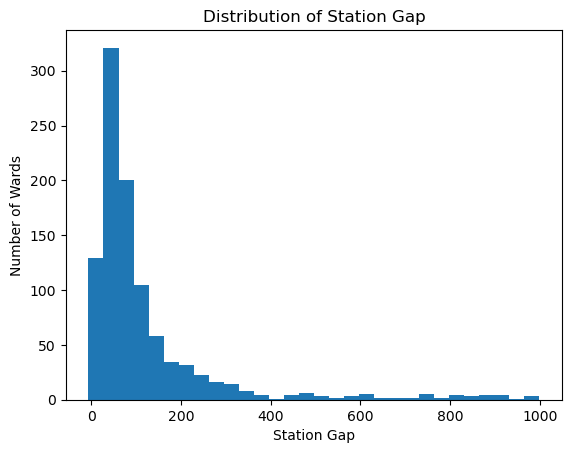

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['station_gap'], bins=30)
plt.xlabel('Station Gap')
plt.ylabel('Number of Wards')
plt.title('Distribution of Station Gap')
plt.show()


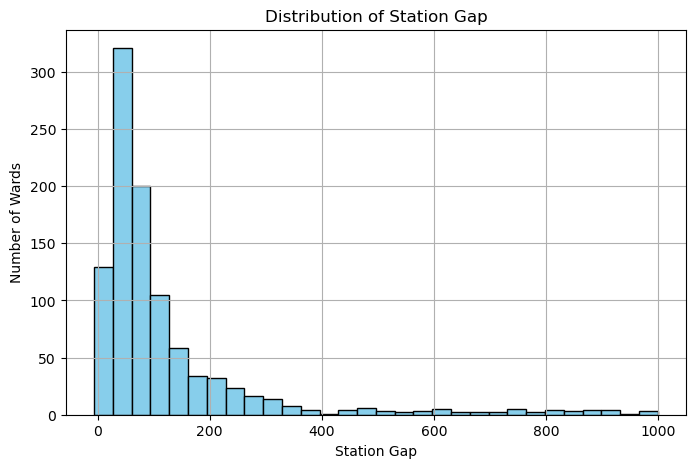

In [6]:
import matplotlib.pyplot as plt

# Plot the histogram of station_gap
plt.figure(figsize=(8,5))
plt.hist(df['station_gap'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Station Gap')
plt.ylabel('Number of Wards')
plt.title('Distribution of Station Gap')
plt.grid(True)
plt.show()


In [7]:
# Binary classification based on station_gap threshold
y = (df['station_gap'] > 50).astype(int)

# Check the balance
print(y.value_counts())


station_gap
1    660
0    340
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
print(y_train.value_counts())


station_gap
1    528
0    272
Name: count, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Initialize the models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

# Step 2: Train (fit) the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
gb.fit(X_train, y_train)

print("✅ All 4 models trained successfully!")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ All 4 models trained successfully!


In [11]:
# Predict for test set
y_pred_lr = logreg.predict(X_test)     # Logistic Regression
y_pred_rf = rf.predict(X_test)          # Random Forest
y_pred_dt = dt.predict(X_test)          # Decision Tree
y_pred_gb = gb.predict(X_test)          # Gradient Boosting


In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt


In [13]:
# Example for Logistic Regression
print("🔵 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm)


🔵 Logistic Regression Results:
Accuracy: 0.97
ROC-AUC: 0.9737076648841355
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.99      0.96      0.98       132

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Confusion Matrix:
 [[ 67   1]
 [  5 127]]


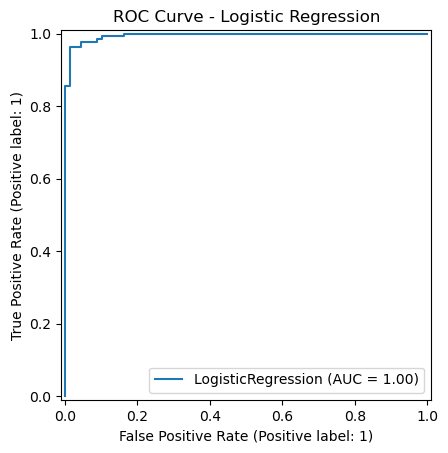

In [14]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('ROC Curve - Logistic Regression')
plt.show()


In [15]:
# 1. Join X and y together temporarily
temp_df = X.copy()
temp_df['target'] = y

# 2. Calculate correlation of features with the target
correlations = temp_df.corr()['target'].drop('target')

# 3. Sort and display
print(correlations.sort_values(ascending=False))


vehicle_density             0.602603
parking_spots               0.033840
commercial_parking_score    0.029961
traffic_congestion_score    0.024187
infrastructure_score        0.019149
commercial_areas            0.010763
power_availability_score    0.002423
power_substations          -0.003163
income_level               -0.006050
land_cost                  -0.007163
major_roads                -0.010744
population_density         -0.021404
existing_ev_stations       -0.354540
population_vehicle_ratio   -0.384928
ev_station_density         -0.696251
Name: target, dtype: float64


In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

for name, model in models.items():
    print(f"🔵 {name}")
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)


🔵 Logistic Regression
Accuracy: 0.9700
ROC-AUC: 0.9951
Confusion Matrix:
[[ 67   1]
 [  5 127]]
----------------------------------------
🔵 Decision Tree
Accuracy: 0.9950
ROC-AUC: 0.9962
Confusion Matrix:
[[ 68   0]
 [  1 131]]
----------------------------------------
🔵 Random Forest
Accuracy: 0.9900
ROC-AUC: 0.9999
Confusion Matrix:
[[ 66   2]
 [  0 132]]
----------------------------------------
🔵 Gradient Boosting
Accuracy: 0.9950
ROC-AUC: 1.0000
Confusion Matrix:
[[ 67   1]
 [  0 132]]
----------------------------------------


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' later

# Train the model
knn.fit(X_train, y_train)

print("✅ KNN model trained!")
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Metrics
print("🔵 KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


✅ KNN model trained!
🔵 KNN Results:
Accuracy: 0.5350
ROC-AUC: 0.4552
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        68
           1       0.63      0.70      0.67       132

    accuracy                           0.54       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.51      0.54      0.52       200

Confusion Matrix:
[[14 54]
 [39 93]]


In [18]:
from xgboost import XGBClassifier

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb.fit(X_train, y_train)

print("✅ XGBoost model trained!")
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("🔵 XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


✅ XGBoost model trained!
🔵 XGBoost Results:
Accuracy: 0.9950
ROC-AUC: 0.9926
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      1.00       132

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
 [[ 67   1]
 [  0 132]]


C:\Users\NITHYA CHERALA\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:46:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# 1. Add noise to features
X_noisy = X.copy()
noise_factor = 0.05
np.random.seed(42)

for col in X_noisy.columns:
    X_noisy[col] += X_noisy[col] * noise_factor * np.random.randn(X_noisy.shape[0])

# 2. Add noise to labels
y_noisy = y.copy()
flip_idx = np.random.choice(len(y_noisy), size=int(0.05 * len(y_noisy)), replace=False)
y_noisy.iloc[flip_idx] = 1 - y_noisy.iloc[flip_idx]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)


In [34]:
# Combine into one DataFrame
noisy_data = X_noisy.copy()
noisy_data['target'] = y_noisy

# View it
print(noisy_data.head())

noisy_data.to_csv('noisy_dataset.csv', index=False)

print("✅ Noisy dataset saved as 'noisy_dataset.csv'")


   population_density   income_level  vehicle_density  existing_ev_stations  \
0        36683.994155  139019.842626       956.578675             10.855315   
1        20715.790334  145026.543593       949.092008              0.000000   
2        99955.460213  103817.613998       121.968134              0.000000   
3        80588.680691   37329.155996       162.459317              5.471922   
4        25957.498081   39399.068077       237.193648              3.083483   

   major_roads  commercial_areas  power_substations  traffic_congestion_score  \
0    12.438729         25.449112           4.721480                  0.737001   
1     6.989079          9.773293           1.936907                  3.187048   
2    18.016215         22.755446           5.717382                  8.933198   
3    17.401736         35.405838           5.835601                  2.303491   
4    12.111542         40.429017           4.946462                  7.197783   

   parking_spots     land_cost  ev_sta

In [36]:
noise=pd.read_csv('noisy_dataset.csv')
noise

,population_density,income_level,vehicle_density,existing_ev_stations,major_roads,commercial_areas,power_substations,traffic_congestion_score,parking_spots,land_cost,ev_station_density,infrastructure_score,population_vehicle_ratio,power_availability_score,commercial_parking_score,target
0,36683.994155,139019.842626,956.578675,10.855315,12.438729,25.449112,4.721480,0.737001,153.745705,26889.119252,11.710003,8.357824,38.241800,0.357352,3959.106961,1
1,20715.790334,145026.543593,949.092008,0.000000,6.989079,9.773293,1.936907,3.187048,300.243786,33271.757645,0.000000,3.558941,19.749449,0.256593,3047.531453,1
2,99955.460213,103817.613998,121.968134,0.000000,18.016215,22.755446,5.717382,8.933198,94.181219,11493.615434,0.000000,28.238033,744.008939,0.290353,2640.457008,1
3,80588.680691,37329.155996,162.459317,5.471922,17.401736,35.405838,5.835601,2.303491,372.865171,27811.262181,30.470330,9.770158,450.180797,0.318002,13484.433466,0
4,25957.498081,39399.068077,237.193648,3.083483,12.111542,40.429017,4.946462,7.197783,404.279276,33436.128743,12.135789,7.195427,99.946358,0.354497,16658.162330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,32757.036193,138493.044009,577.227565,0.000000,12.968173,41.351512,1.970213,3.330795,127.645351,24151.189519,0.000000,7.054148,56.110813,0.147273,4970.172095,1
996,66197.394213,136443.826648,873.109134,6.272766,2.071141,33.844237,6.230709,0.194813,166.162659,31675.712196,8.252712,3.963692,70.105204,2.041666,5334.772325,1
997,46596.702759,94969.287670,377.040612,2.951955,10.400810,22.539115,5.841783,4.139511,356.209378,33497.499636,7.902710,6.301456,109.080589,0.588433,8439.634365,1
998,81339.730600,75274.217945,939.438950,8.657351,2.080804,44.006093,1.999489,0.357402,436.519290,17878.456309,9.000494,3.421868,97.503112,0.673031,18576.822737,1


In [37]:
noise.isnull().sum()

population_density          0
income_level                0
vehicle_density             0
existing_ev_stations        0
major_roads                 0
commercial_areas            0
power_substations           0
traffic_congestion_score    0
parking_spots               0
land_cost                   0
ev_station_density          0
infrastructure_score        0
population_vehicle_ratio    0
power_availability_score    0
commercial_parking_score    0
target                      0
dtype: int64

In [26]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("\n🔵 Logistic Regression Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_logreg):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))



🔵 Logistic Regression Results
Accuracy: 0.9300
ROC-AUC: 0.9071
Confusion Matrix:
 [[ 51   9]
 [  5 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        60
           1       0.94      0.96      0.95       140

    accuracy                           0.93       200
   macro avg       0.92      0.91      0.92       200
weighted avg       0.93      0.93      0.93       200



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔵 Random Forest Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



🔵 Random Forest Results
Accuracy: 0.9500
ROC-AUC: 0.9357
Confusion Matrix:
 [[ 54   6]
 [  4 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        60
           1       0.96      0.97      0.96       140

    accuracy                           0.95       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.95      0.95       200



In [28]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n🔵 K-Nearest Neighbors Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



🔵 K-Nearest Neighbors Results
Accuracy: 0.5750
ROC-AUC: 0.4917
Confusion Matrix:
 [[17 43]
 [42 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.28      0.29        60
           1       0.70      0.70      0.70       140

    accuracy                           0.57       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.57      0.57      0.57       200



In [29]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n🔵 XGBoost Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



🔵 XGBoost Results
Accuracy: 0.9450
ROC-AUC: 0.9274
Confusion Matrix:
 [[ 53   7]
 [  4 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91        60
           1       0.95      0.97      0.96       140

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200



C:\Users\NITHYA CHERALA\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:54:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
